1)a) MNIST classification:

i) **Learning rate** – explain what happens when you use too large or too small value and explain why it is happening.-- Learning rate is a training hyper hyperparameters that provide the scale of movement towards finding the local minimum in some particular direction. There are drawbacks of taking a huge learning rate as well as a very low learning rate. A very high learning rate would tend to hope the base whereas the very less learning rate can take a huge time to get to the lowest value. The best learning rate is the one which gives the optimal value.

ii) **Weight decay** – explain what happens when you use too large or too small regularization and explain why it is happening.-- Having a high value of weight decay will never help us to get the model to fit well =, no matter how much we train. Whereas, if we have too little weight decay, we can train the model well but just have to stop a bit early. It also helps in preventing the model to overfit.



In [0]:
# Training hyperparameters that are choosed are:
epochs = 1
batch_size = 64
learning_rate = 0.019
weight_decay = 0.001

0it [00:00, ?it/s]

9920512it [00:01, 9559585.18it/s]                            


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 136386.46it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


1654784it [00:00, 2249820.55it/s]                            
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


8192it [00:00, 52017.89it/s]            


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!

Test set: Average loss: 4.2359, Accuracy: 811/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 3.874303
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.653561
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.574565
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.276433
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.127106
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.076306
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.200793
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.091858
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.286465
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.202839
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.302999
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.025426
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.031985
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.149278
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.013923
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.115969
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.038655
Train Epoch

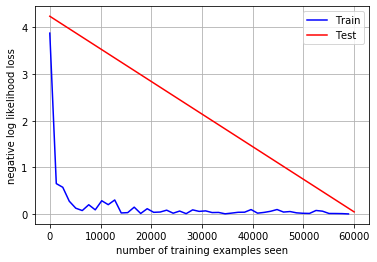

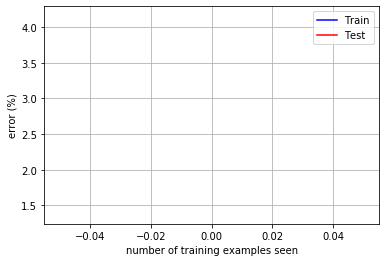

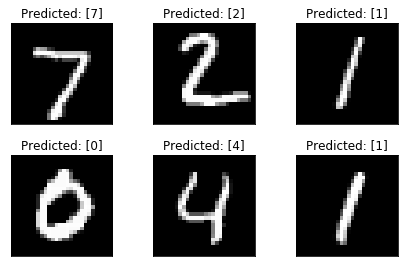

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Training hyperparameters
epochs = 1
batch_size = 64
# learning_rate = 0.019 with weight = 0.00 gives the Accuracy = 99%
# learning_rate = 0.019 with weight = 0.02 gives the Accuracy = 98%
# The best accurcy was achieved when learning rate was kept at 0.019 whereas the weight_decay at 0.001

learning_rate = 0.019 
momentum = 0.9
weight_decay = 0.001
log_interval = 20

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, 
                               kernel_size=5, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, 
                               kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=800, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 800)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=24, out_channels=64, 
                               kernel_size=3, stride=1, padding=2)
        self.fc1 = nn.Linear(in_features=1200, out_features=196)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        # TODO        

    def forward(self, x):
        # TODO
        return F.log_softmax(x, dim=1)

def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))
  
def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    test_data = datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    #examples = enumerate(test_loader)
    #batch_idx, (data, target) = next(examples)
    #plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN().to(device)
    # optimizer creation
    #Changing the learning rate and the weight decay in this function to get the best accuracy
    optimizer = optim.SGD(model.parameters(), lr=0.019, momentum=momentum, weight_decay=0.001)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = []
    test_errors = []
    error_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    # test of randomly initialized model
    test(model, device, test_loader, losses=test_losses)

    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
		
    # plotting training history
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
	
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')
	
if __name__ == '__main__':
    main()


b) Correct the mistakes in CNN2 and train it on MNIST train set. Desired architecture of CNN2 is displayed on following diagam:

0it [00:00, ?it/s]

9920512it [00:01, 8654275.31it/s]                            


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 130175.43it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


1654784it [00:00, 2132933.90it/s]                            
0it [00:00, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


8192it [00:00, 49876.31it/s]            


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!

Test set: Average loss: 3.4097, Accuracy: 1004/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.997641
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.992742
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.426279
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.304382
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.210308
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.198559
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.073444
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.093320
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.106008
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.048841
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.187607
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.166320
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.060211
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.122629
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.224156
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.165138
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.134870
Train Epo

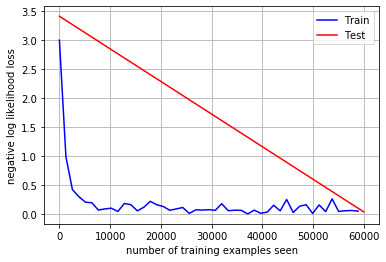

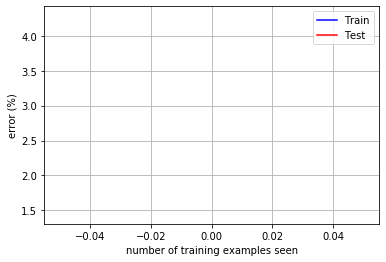

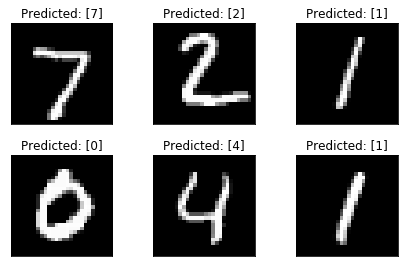

In [55]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Training hyperparameters
epochs = 1
batch_size = 64
learning_rate = 0.019
momentum = 0.9
weight_decay = 0.001
log_interval = 20

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, 
                               kernel_size=5, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, 
                               kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=800, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 800)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(in_features=3136, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        # TODO        

    def forward(self, x):
        # TODO
        return F.log_softmax(x, dim=1)

def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))
  
def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    test_data = datasets.MNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    #examples = enumerate(test_loader)
    #batch_idx, (data, target) = next(examples)
    #plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN2().to(device)
    # optimizer creation
    optimizer = optim.SGD(model.parameters(), lr=0.019, momentum=momentum, weight_decay=0.001)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = []
    test_errors = []
    error_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    # test of randomly initialized model
    test(model, device, test_loader, losses=test_losses)

    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
		
    # plotting training history
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
	
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')
	
if __name__ == '__main__':
    main()


C) Change dataset to fashion MNIST, estimate the dataset mean and standard deviation and use it to normalize the data in the data loader.

In [0]:
train_data_fashionMNIST = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ]))
train_loader_fashionMNIST = torch.utils.data.DataLoader(train_data_fashionMNIST, batch_size=60000, shuffle=True)
data_sample = enumerate(train_loader_fashionMNIST)
batch_idx, (example_data, example_targets) = next(data_sample)
mean = example_data.mean()
std  = example_data.std()

In [0]:
mean


tensor(0.2859)

In [0]:
std


tensor(0.3530)


Test set: Average loss: 2.8915, Accuracy: 1166/10000 (12%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.791825
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.568370
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.516596
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.636714
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.647401
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.685363
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.366192
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.299935
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.492995
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.340318
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.673986
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.308515
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.303734
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.769884
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.538882
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.425471
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.288634
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.453059
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.328373
Train

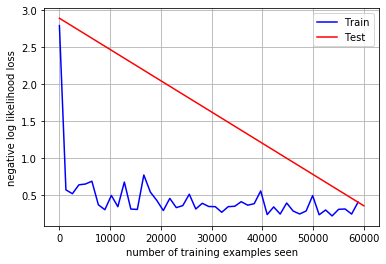

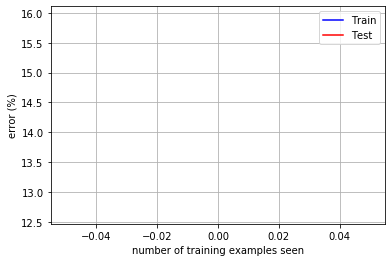

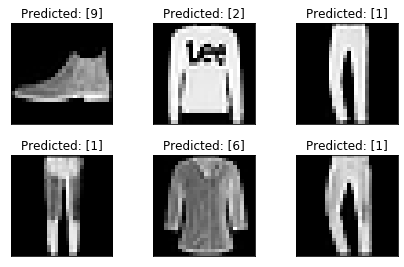

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Training hyperparameters
epochs = 1
batch_size = 64
# learning_rate = 0.019 with weight = 0.00 gives the Accuracy = 99%
# learning_rate = 0.019 with weight = 0.02 gives the Accuracy = 98%
# The best accurcy was achieved when learning rate was kept at 0.019 whereas the weight_decay at 0.001

learning_rate = 0.019
momentum = 0.9
weight_decay = 0.001
log_interval = 20

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, 
                               kernel_size=5, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, 
                               kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=800, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 800)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=2)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=24, out_channels=64, 
                               kernel_size=3, stride=1, padding=2)
        self.fc1 = nn.Linear(in_features=1200, out_features=196)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 3136)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        # TODO        

    def forward(self, x):
        # TODO
        return F.log_softmax(x, dim=1)

def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))
  
def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    # Data set of Fashion MNIST is being used along with the Mean and Standard deviation
    train_data = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.2859,), (0.3530,))
                   ]))
    # Data set of Fashion MNIST is being used along with the Mean and Standard deviation
    test_data = datasets.FashionMNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.2859,), (0.3530,))
                   ]))

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    #examples = enumerate(test_loader)
    #batch_idx, (data, target) = next(examples)
    #plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN().to(device)
    # optimizer creation
    #Changing the learning rate and the weight decay in this function to get the best accuracy
    optimizer = optim.SGD(model.parameters(), lr=0.019, momentum=momentum, weight_decay=0.001)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = []
    test_errors = []
    error_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    # test of randomly initialized model
    test(model, device, test_loader, losses=test_losses)

    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
		
    # plotting training history
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
	
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')
	
if __name__ == '__main__':
    main()


d) Design CNN3 with additional regularization of your choosing. Explain benefits of such regularization and report its accurracy on fashion MNIST and its relative improvement over CNN2.


Test set: Average loss: 3.7843, Accuracy: 392/10000 (4%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 3.065051
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.960365
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.926664
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.519266
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.527862
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.551255
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.525367
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.677551
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.458983
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.615775
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.350848
Train Epoch: 1 [14080/60000 (23%)]	Loss: 0.470232
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.430018
Train Epoch: 1 [16640/60000 (28%)]	Loss: 0.477640
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.484834
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.327940
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.408798
Train Epoch: 1 [21760/60000 (36%)]	Loss: 0.542676
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.316568
Train E

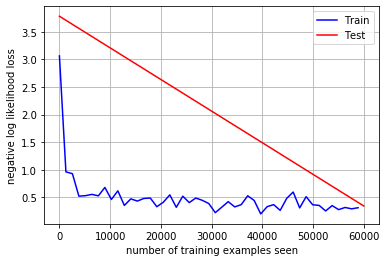

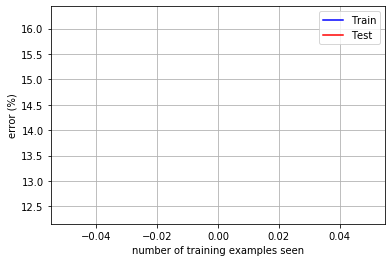

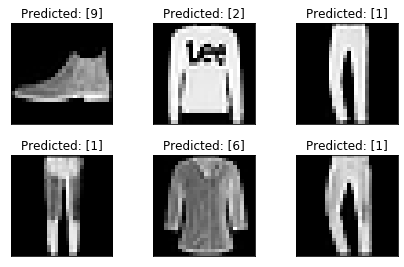

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Training hyperparameters
epochs = 1
batch_size = 64
learning_rate = 0.019 # TODO
momentum = 0.9
weight_decay = 0.001 # TODO
log_interval = 20

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, 
                               kernel_size=5, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, 
                               kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(in_features=800, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 800)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=0)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=5, stride=1, padding=0)
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(in_features=1024, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)

        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 1024)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        # Added BN1 BN2 and drop_out1 drop_out2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, 
                               kernel_size=5, stride=1, padding=0)
        self.BN1 = nn.BatchNorm2d(64)
        self.drop_out1 = nn.Dropout(0.25)
        self.maxpool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, 
                               kernel_size=5, stride=1, padding=0)
        self.BN2 = nn.BatchNorm2d(64)
        self.drop_out2 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(in_features=1024, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=10)
        nn.init.kaiming_normal_(self.conv1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.conv2.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='linear')

    def forward(self, x):
        # Added BN1 BN2 and drop_out1 drop_out2
        x = self.conv1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.BN1(x)
        x = self.drop_out1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        x = self.BN2(x)
        x = self.drop_out2(x)
        x = x.view(-1, 1024)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

def plot_data(data, label, text):
    fig = plt.figure()
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.tight_layout()
        plt.imshow(data[i][0], cmap='gray', interpolation='none')
        plt.title(text + ": {}".format(label[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
	
def predict_batch(model, device, test_loader):
    examples = enumerate(test_loader)
    model.eval()
    with torch.no_grad():
        batch_idx, (data, target) = next(examples)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.cpu().data.max(1, keepdim=True)[1] # get the index of the max log-probability
        pred = pred.numpy()
    return data.cpu().data.numpy(), target.cpu().data.numpy(), pred

def plot_graph(train_x, train_y, test_x, test_y, ylabel=''):
    fig = plt.figure()
    plt.plot(train_x, train_y, color='blue')
    plt.plot(test_x, test_y, color='red')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.xlabel('number of training examples seen')
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

def train(model, device, train_loader, optimizer, epoch, losses=[], counter=[], errors=[]):
    model.train()
    correct=0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            losses.append(loss.item())
            counter.append((batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(target.view_as(pred)).sum().item()
    errors.append(100. * (1 - correct / len(train_loader.dataset)))

def test(model, device, test_loader, losses=[], errors=[]):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    losses.append(test_loss)
    errors.append(100. *  (1 - correct / len(test_loader.dataset)))
  
def main():
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # data transformation
    train_data = datasets.FashionMNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.2859,), (0.3530,))
                   ]))
    test_data = datasets.FashionMNIST('../data', train=False, 
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.2859,), (0.3530,))
                   ]))

    # data loaders
    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)

	# extract and plot random samples of data
    #examples = enumerate(test_loader)
    #batch_idx, (data, target) = next(examples)
    #plot_data(data, target, 'Ground truth')
	
    # model creation
    model = CNN3().to(device)
    # optimizer creation
    optimizer = optim.SGD(model.parameters(), lr=0.019, momentum=momentum, weight_decay=0.001)

    # lists for saving history
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]
    train_errors = []
    test_errors = []
    error_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    # test of randomly initialized model
    test(model, device, test_loader, losses=test_losses)

    # global training and testing loop
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, epoch, losses=train_losses, counter=train_counter, errors=train_errors)
        test(model, device, test_loader, losses=test_losses, errors=test_errors)
		
    # plotting training history
    plot_graph(train_counter, train_losses, test_counter, test_losses, ylabel='negative log likelihood loss')
    plot_graph(error_counter, train_errors, error_counter, test_errors, ylabel='error (%)')
	
    # extract and plot random samples of data with predicted labels
    data, _, pred = predict_batch(model, device, test_loader)
    plot_data(data, pred, 'Predicted')
	
if __name__ == '__main__':
    main()


-- Results: 
Initially the Average loss was :**0.3535** with Accuracy: 8737/10000 (87%). 
Whereas, 
Afrer regularization the Average loss **decreased** to: **0.3409** with **increased**  Accuracy: 8765/10000 (88%). Therefore, regularization helps in increasing the accurcy.

For this I have used Batch Normilization along with Droup out of 25%.

e) Download file YourEmail_in.csv from the course drive. File contains 5x5 array of integers X.  

-- Please find the file attached with the result. The file name is RRASTOGI@TCD.IE_out.csv. 

Convolution is used most often to express the blurring of one signal by the characteristic response of something else.  Depending on the context it may be used for how an image signal is degraded by the shape of the lens aperature and focus, OR how an audio signal is degraded by the response of amplifiers and other  processing it passes through.
Cross correlation expresses the degree of match between signals. In pattern recognition one might use the cross correlation of an incoming signal and a library of possible patterns in order to detect which one was transmitted.

In [0]:
import numpy as np
img = [[73,145,189,2,62],
      [176,156,110,187,179],
      [166,255,145,157,67],
      [103,138,210,191,70],
      [244,90,19,47,73]]
w = [[1,0,1],
      [0,0,0],
      [-1,0,-1]]

In [0]:
crosd = np.array([[ -49, -265,   39],
       [ -27,   14,    9],
       [  48,  275,  120]])

In [0]:
conv = np.array([[  49,  265,  -39],
       [  27,  -14,   -9],
       [ -48, -275, -120]]) 

In [54]:
conv/crosd

array([[-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.]])

-- **NOTE**: The basic difference between the convolution and correlation is that the convolution process **rotates the matrix by 180 degrees**. Most of the times the choice of using the convolution and correlation is up to the preference of the users, and it is identical when the kernel is symmetrical.

f) Calculate the number of parameters and the number of FLOPS of this network and
submit them in YourEmail_params.csv each of the 2 values in separate row (number of
parameters in the first row).

-- Please find the file attached with the result. The file name is RRASTOGI@TCD.IE_params.csv.

2) a) Briefly explain how the authors have decided on the particular network depth. Which tasks is the DnCNN-3 designed to solve?

-- As stated that the depth should be e (2d+1)×(2d+1). To achieve the best tradeoff in performance and efficiency, we must have proper depth for DnCNN. Different experiments where carried out with Mehtiods  - BM3D [2] WNNM [13] EPLL [33] MLP [24] CSF [14] TNRD [16]. The cloeset result was achieved with FPLL. Thus, 35 × 35 is set as receptive field size of DnCNN with the corresponding depth of 17. 

DnCNN-3 is basically designed to solve three tasks that are blind Gaussian
denoising, SISR and JPEG image deblocking. None of the existing models other than DnCNN-3 have been reported to pick up all the mentioned tasks.


b) Use main_test.py to test the pretrained model on denoising the whole Set68 with σ=25 and report the obtained average PSNR and SSIM metrics. Download YourEmail_sigma.csv that contains specific value of σ. Test the same model on the same set corrupted by this particular σ and report the results.

-- The result when σ=25 is:

    PSNR = 29.26dB 
    SSIM = 0.9022

-- The result when σ=48 is:

    PSNR = 17.47dB
    SSIM = 0.3667

c) Finetune the pre-trained model using script main_train.py for 1 epoch with learning rate 0.0001 with σ level given from YourEmail_sigma.csv and test its performance (PSRN/SSIM) on Set68 using this corruption level.

-- The result obtained on setting the learning rate 0.0001 with σ=48 and 1 apoch is: 

    PSNR = 26.44dB
    SSIM = 0.8323

d) The result for this is saved in the following files (please find the attached in the folder): 

(with pretrained model)

      --  RRASTOGI@TCD.IE.ie_003_pretrained.png

      --  RRASTOGI@TCD.IE_psnr.csv

(Finetuned model)

      --  RRASTOGI@TCD.IE_003_clean.png

      --  RRASTOGI@TCD.IE_psnr.csv (second row containing the data)


e) Modifythenetworkto output the estimated noise (Residual image in Fig.1) instead of the clean image. Generate noise from YourEmail_XXX.pngby your finetuned network and save it as a grayscale image centered around intensity 127named YourEmail_XXX_noise.png. Report the standard deviation of the noise in this image.


-- File for this attached with the submission by name : RRASTOGI@TCD.IE_003_noise.png. The standard deviation of the noise in the image is : 33.93695045260883

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# load an image
img_noise = Image.open('./RRASTOGI@TCD.IE_003_noise.png')

In [0]:
np.std(img_noise)

33.93695045260883

3) a) Briefly explain: 

i) How FCN upsamples predictions to match the original image size.

-- Backward convolution is on of the best way to upscale with factor f. The input stride of 1/f is used with output stride of f. Upsampling is performed in-network for end-to-end learning by backpropagation from the pixelwise loss. 
Upsampling is fast and effective for learning dense prediction.

ii) How had the authors improved the coarse predictions produced by the deepest layer. 

-- By adding skips in final prediction layer with lower layers with finer strides the author imporves the coarseby the deepest layer. Combining fine layers and coarse layers lets the model make local predictions that respect global structure.

b) Download YourEmail.pngand take a class index assigned to you from classes.csv.Modifysegmentation.pyso thatyou predict segmentation mask of this class(by FCN model)on the image given to you and highlight predictionviaredmask blended withthe original image.Submit thisimage as YourEmail_predicted.png.See example output for the class 4 (boat) below.

-- Please find the file attached with the file name RRASTOGI@TCD.IE_predicted.png

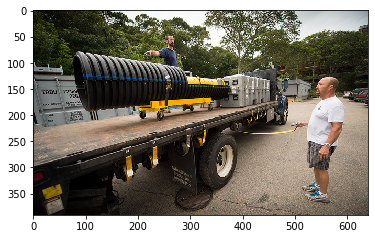

torch.Size([1, 21, 391, 640])
[ 0  7 15]


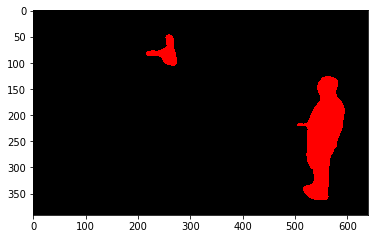

In [0]:
# -*- coding: utf-8 -*-
"""
Based on code from
    https://colab.research.google.com/github/spmallick/learnopencv/blob/master/PyTorch-Segmentation-torchvision/intro-seg.ipynb
"""

from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models
import numpy as np
import torchvision.transforms as T
import cv2


def decode_segmap(image, nc=21):
  # To Represent the image in RED color, changed the RBG values for person.
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (255, 0, 0),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
      idx = image == l
      # Adding a consition to select person out of all the set 
      if l == 15:
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb


def apply_mask(im, im_pred):
    """
    Overlays the predicted class labels onto an image using the alpha channel.
    This function assumes that the background label is the black color.
    This function is provided as an inspiration for the masking function you should write.
    """
    r_channel, g_channel, b_channel = cv2.split(im_pred)
    alpha_channel = 127 * np.ones(b_channel.shape, dtype=b_channel.dtype)
    # Make background pixels fully transparent
    alpha_channel -= 127 * np.all(im_pred == np.array([0, 0, 0]), axis=2).astype(b_channel.dtype)
    im_pred = cv2.merge((r_channel, g_channel, b_channel, alpha_channel))
    mask = Image.fromarray(im_pred, mode='RGBA')
    masked_img = Image.fromarray(im)
    masked_img.paste(mask, box=None, mask=mask)
    return np.array(masked_img)

# define the model
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

# load an image
img = Image.open('./RRASTOGI@TCD.IE.png')
plt.imshow(img); plt.show()

# transform the image
trf = T.Compose([T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

# pass the input through the net
out = fcn(inp)['out']
print (out.shape)

# calculate labels
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (np.unique(om))

# show segmentation output
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()



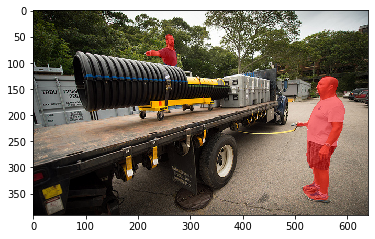

In [0]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
tobeprocessed = Image.open('./RRASTOGI@TCD.IE.png')
#tobeprocessed = cv2.imread('RRASTOGI@TCD.IE.png')
result = apply_mask(np.array(tobeprocessed), rgb)
plt.imshow(result)
plt.show()
plt.imsave("RRASTOGI@TCD.IE_predicted.png", result)

c) Decode the groundtruth image YourEmail_mask.png and calculate intersection over union (IOU) with the prediction for the class assigned to you. Report IOU in file YourEmail_iou.csv.

-- The output is attached with the submission with the file name RRASTOGI@TCD.IE_iou.csv.
-- The IOU score achieved is : 0.8372046186895811

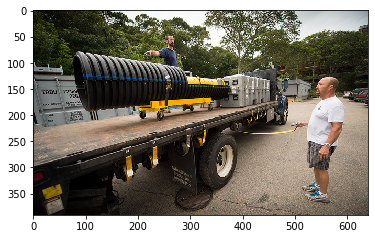

torch.Size([1, 21, 391, 640])
[ 0  7 15]


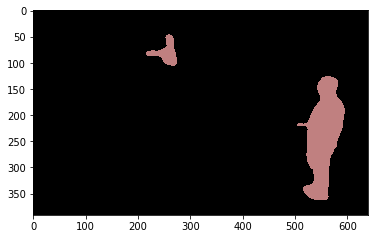

In [0]:
# -*- coding: utf-8 -*-
"""
Based on code from
    https://colab.research.google.com/github/spmallick/learnopencv/blob/master/PyTorch-Segmentation-torchvision/intro-seg.ipynb
"""

from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models
import numpy as np
import torchvision.transforms as T
import cv2


def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
      idx = image == l
      if l==15:
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb


def apply_mask(im, im_pred):
    """
    Overlays the predicted class labels onto an image using the alpha channel.
    This function assumes that the background label is the black color.
    This function is provided as an inspiration for the masking function you should write.
    """
    r_channel, g_channel, b_channel = cv2.split(im_pred)
    alpha_channel = 127 * np.ones(b_channel.shape, dtype=b_channel.dtype)
    # Make background pixels fully transparent
    alpha_channel -= 127 * np.all(im_pred == np.array([0, 0, 0]), axis=2).astype(b_channel.dtype)
    im_pred = cv2.merge((r_channel, g_channel, b_channel, alpha_channel))
    mask = Image.fromarray(im_pred, mode='RGBA')
    masked_img = Image.fromarray(im)
    masked_img.paste(mask, box=None, mask=mask)
    return np.array(masked_img)

# define the model
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

# load an image
img = Image.open('./RRASTOGI@TCD.IE.png')
plt.imshow(img); plt.show()

# transform the image
trf = T.Compose([T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

# pass the input through the net
out = fcn(inp)['out']
print (out.shape)

# calculate labels
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (np.unique(om))

# show segmentation output
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()



In [0]:
import numpy as np
from PIL import Image
label = Image.open('RRASTOGI@TCD.IE_mask.png')
#label = cv2.imread('RRASTOGI@TCD.IE_mask.png')
#label = cv2.cvtColor(label, cv2.COLOR_BGR2RGB)
intersection = np.logical_and(label, rgb)
union = np.logical_or(label, rgb)
iou_score = np.sum(intersection) / np.sum(union)

In [0]:
iou_score

0.8372046186895811